Importar todas las librerías necesarias para el proyecto.

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Se generan todos los dataframes necesarios para realizar análsis. Luego se visualizarán las primeras columnas para verificar que estén correctamente importados y luego se analizarán sus valores faltantes.

In [ ]:
df_accesos=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Accesos Por Tecnología")

In [ ]:
df_accesos.head()

In [ ]:
valores_faltantes1=df_accesos.isnull().sum()
valores_faltantes1

In [ ]:
df_localidad=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Accesos_tecnologia_localidad")

In [ ]:
df_localidad.head()

In [ ]:
df_localidad.isnull().sum()

In [ ]:
df_veolocidad_provincia=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Velocidad % por prov")

In [ ]:
df_veolocidad_provincia.head()

In [ ]:
df_veolocidad_provincia.isnull().sum()

In [ ]:
df_accesos_tec_totales=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Totales Accesos Por Tecnología")

In [ ]:
df_accesos_tec_totales.head()

In [ ]:
df_accesos_tec_totales.isnull().sum()

In [ ]:
df_penetracion=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Penetración-poblacion")

In [ ]:
df_penetracion.head()

In [ ]:
df_penetracion.isnull().sum()

In [ ]:
df_penetracion_hogares=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Penetracion-hogares")

In [ ]:
df_penetracion_hogares.head()

In [ ]:
df_penetracion_hogares.isnull().sum()

In [ ]:
df_accesos_velocidad=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Totales Accesos por velocidad")

In [ ]:
df_accesos_velocidad.head()

In [ ]:
df_accesos_velocidad.isnull().sum()

In [119]:
df_ingresos=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Ingresos")

In [ ]:
df_ingresos.head()

In [ ]:
df_ingresos.isnull().sum()

In [ ]:
df_accesos_totalidad=pd.read_excel(r"C:\Users\jessi\Desktop\PI Henry 2\Datasets\Internet.xlsx",sheet_name="Accesos por velocidad")

Conclusión:Los DataFrames no tienen valores faltantes.

## Valores duplicados

In [ ]:
#Duplicados de Accesos Por Tecnología 
df_accesos.duplicated().sum()

In [ ]:
#Duplicados de "Accesos_tecnologia_localidad"
df_localidad.duplicated().sum()


In [ ]:
#Duplicados de "Velocidad % por prov"
df_veolocidad_provincia.duplicated().sum()


In [ ]:
#Duplicados de "Totales Accesos Por Tecnología"
df_accesos_tec_totales.duplicated().sum()


In [ ]:
#Duplicados de "Penetración-población"
df_penetracion.duplicated().sum()


In [ ]:
#Duplicados de "Penetracion-hogares"
df_penetracion_hogares.duplicated().sum()


In [ ]:
#Duplicados de "Totales Accesos por velocidad"
df_accesos_velocidad.duplicated().sum()


In [ ]:
#Duplicados de "ingresos"
df_ingresos.duplicated().sum()


In [ ]:
#Duplicados de "Accesos por velocidad"
df_accesos_totalidad.duplicated().sum()


Conclusión: En los datasets seleccionados no hay valores duplicados. 

# Tratamiento de outliers

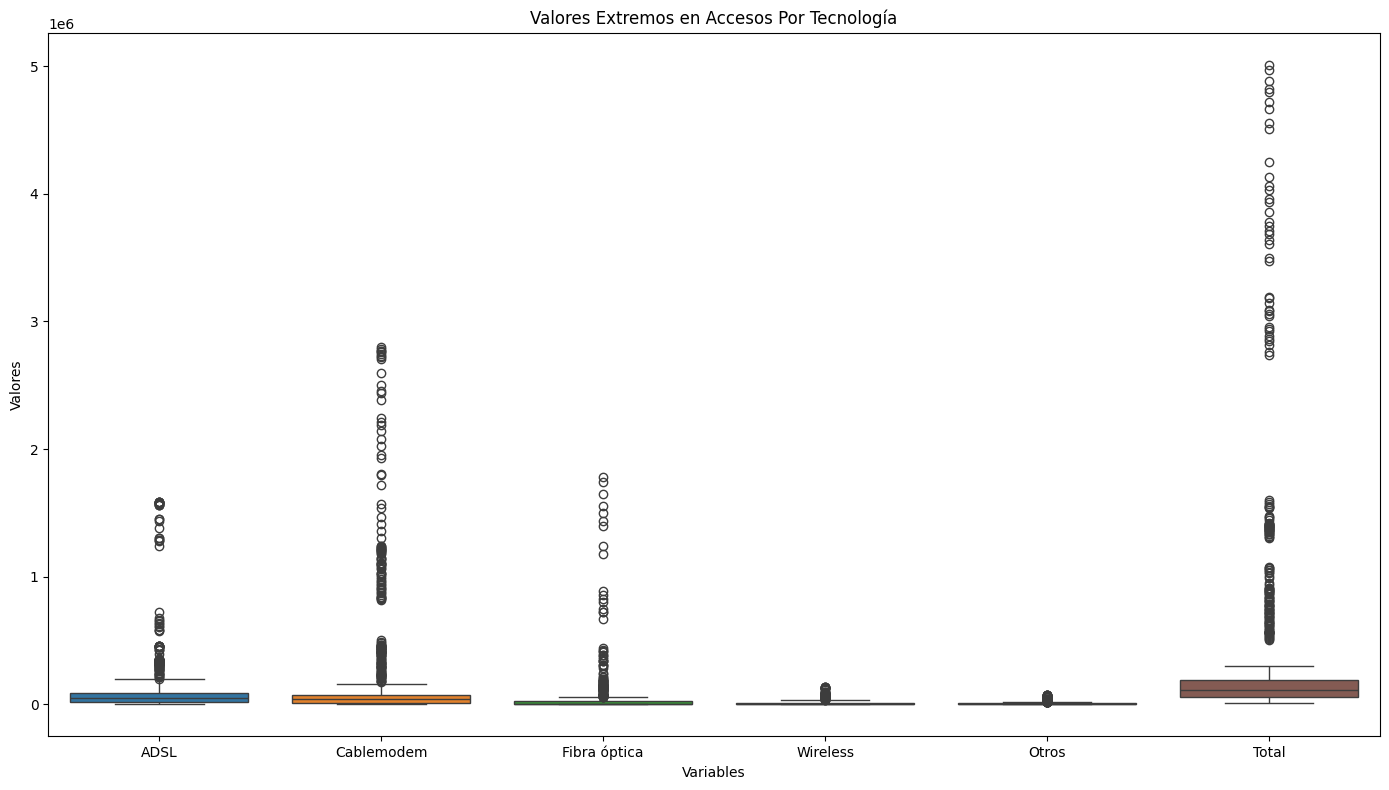

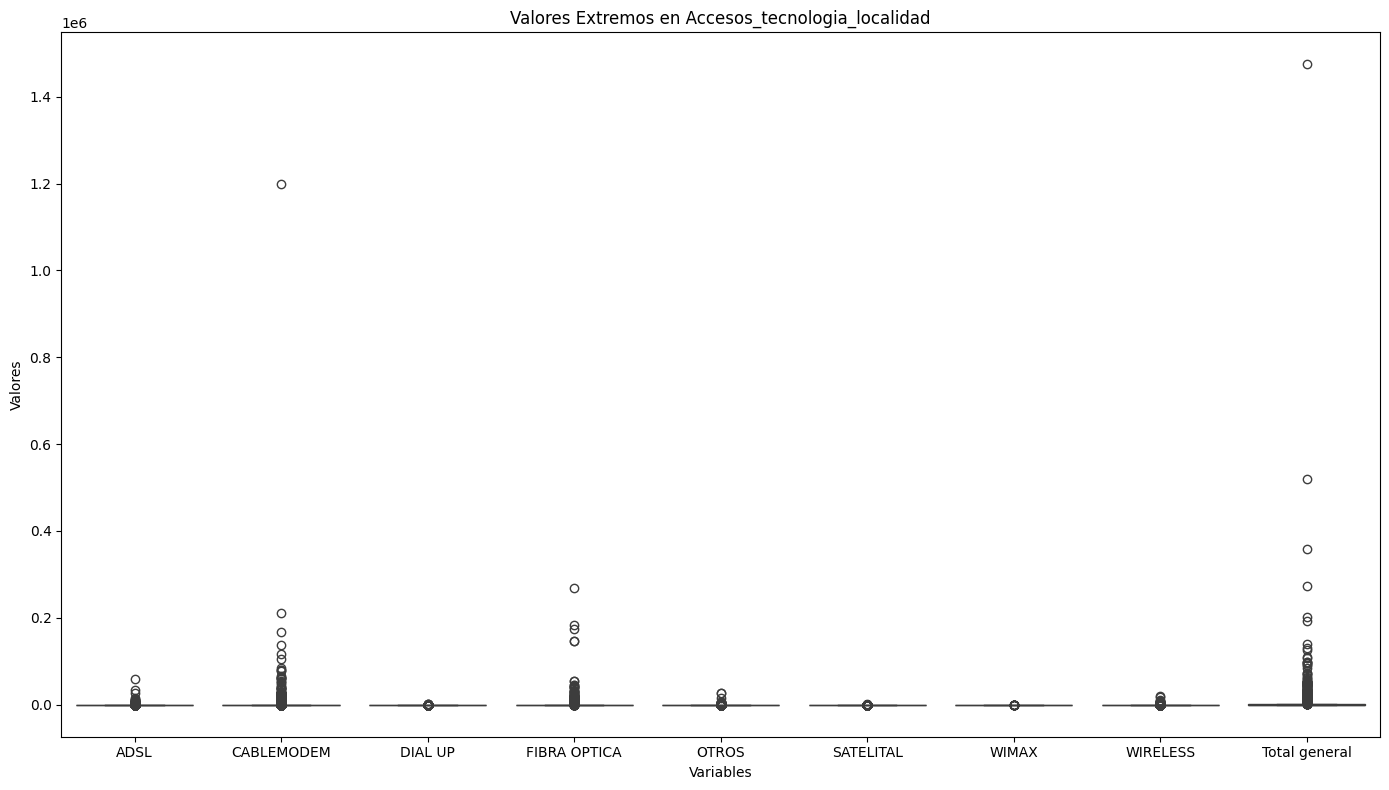

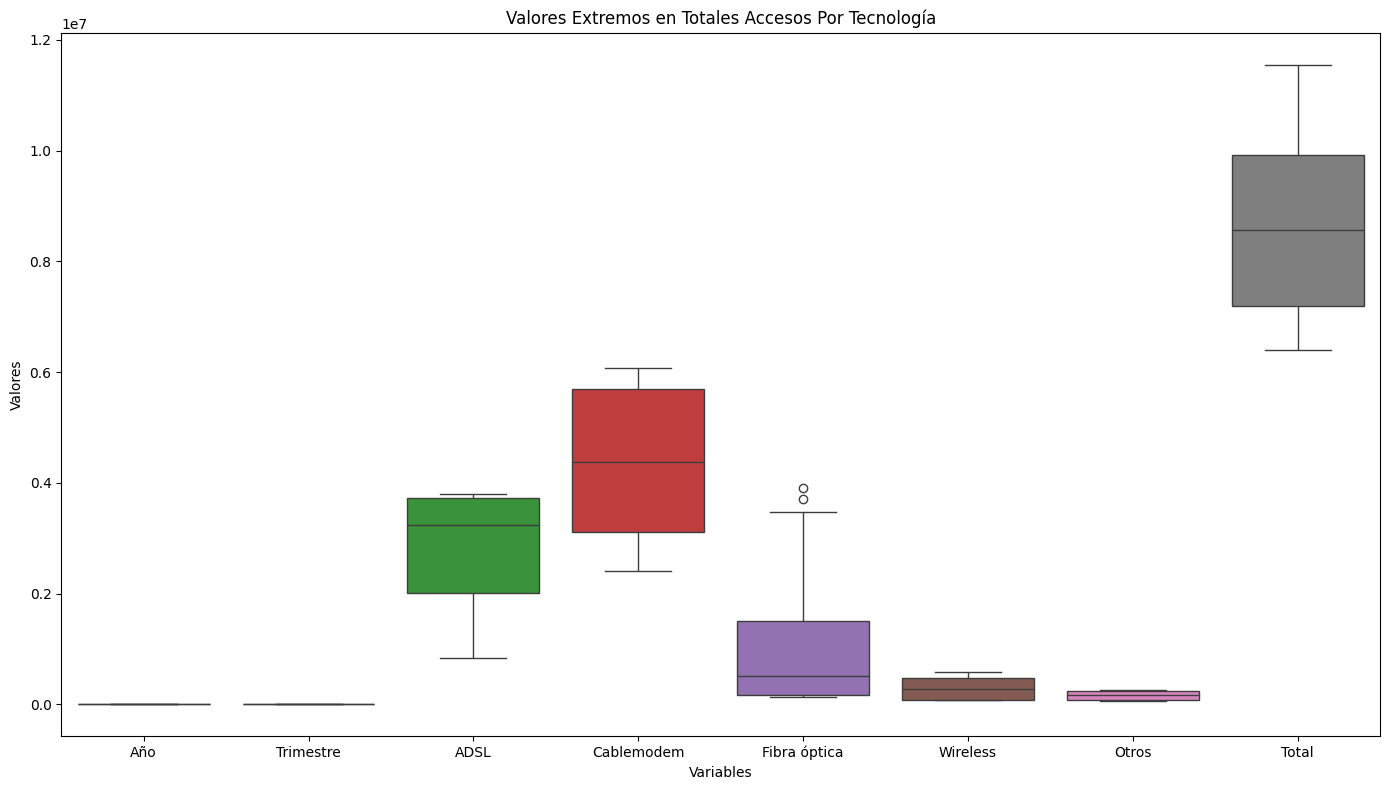

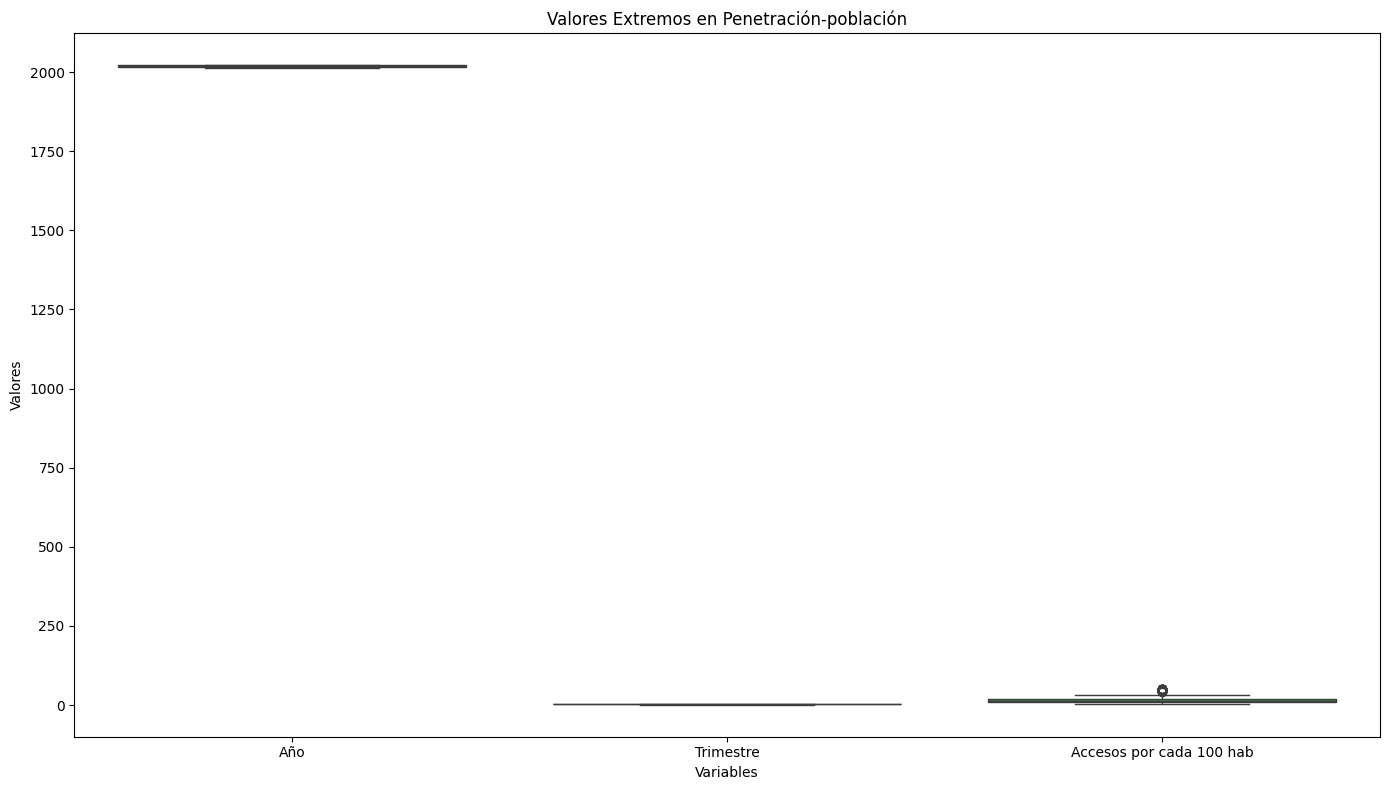

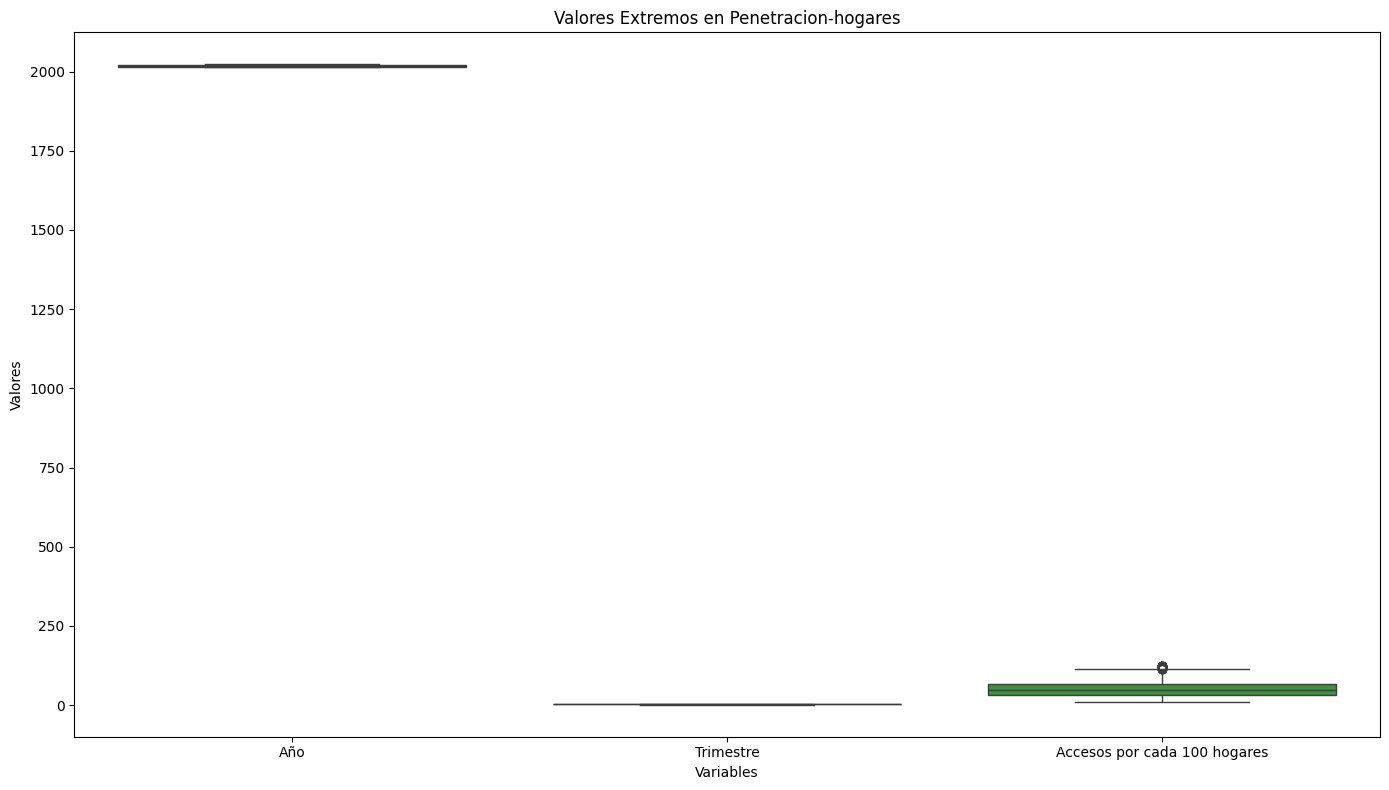

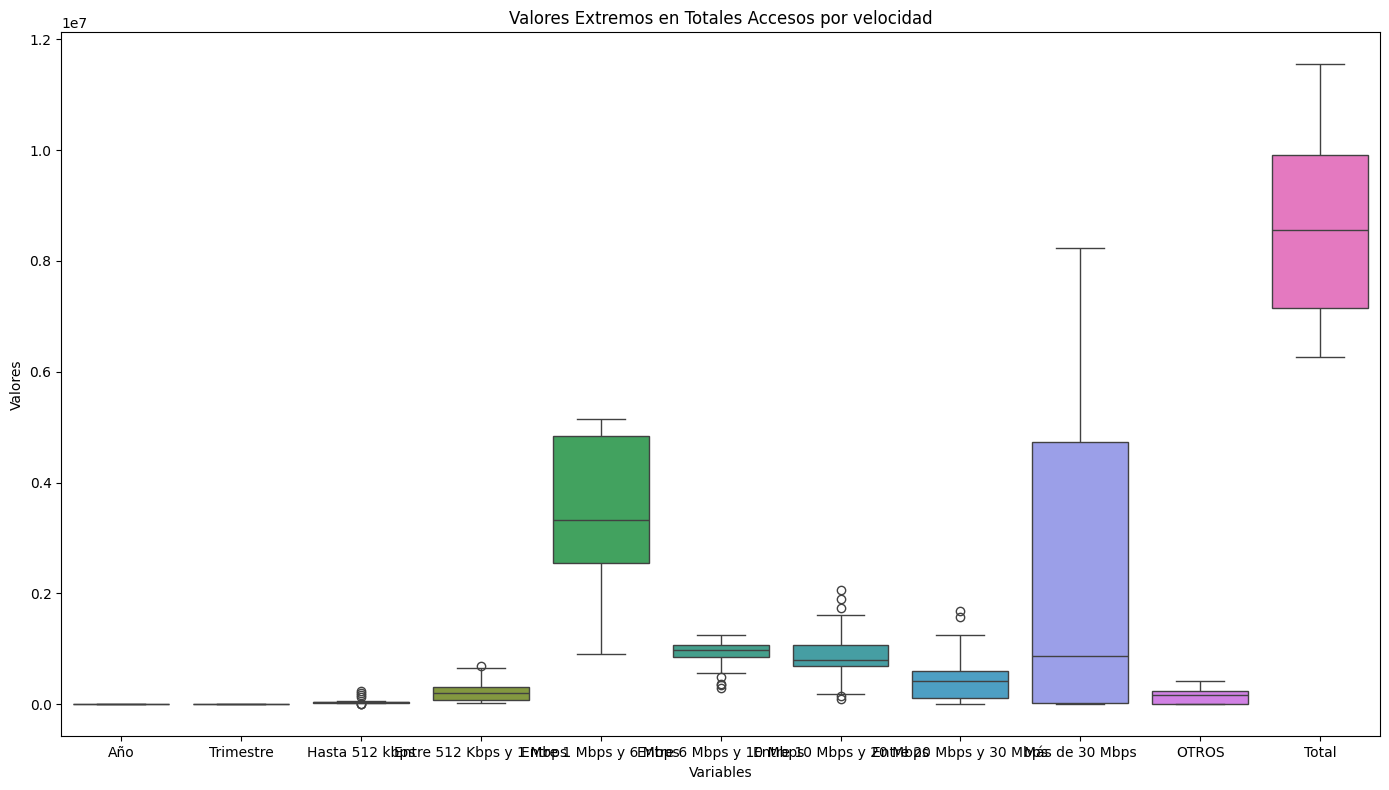

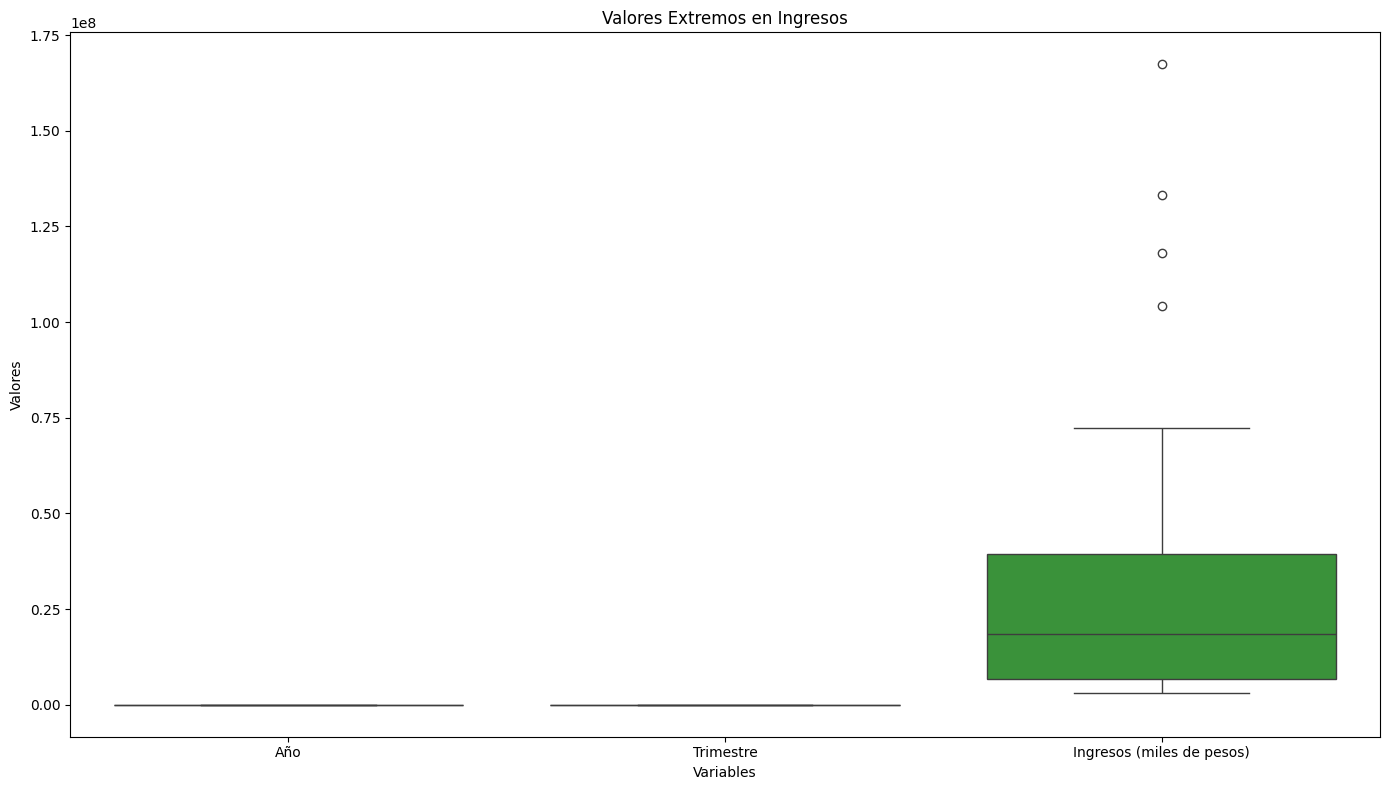

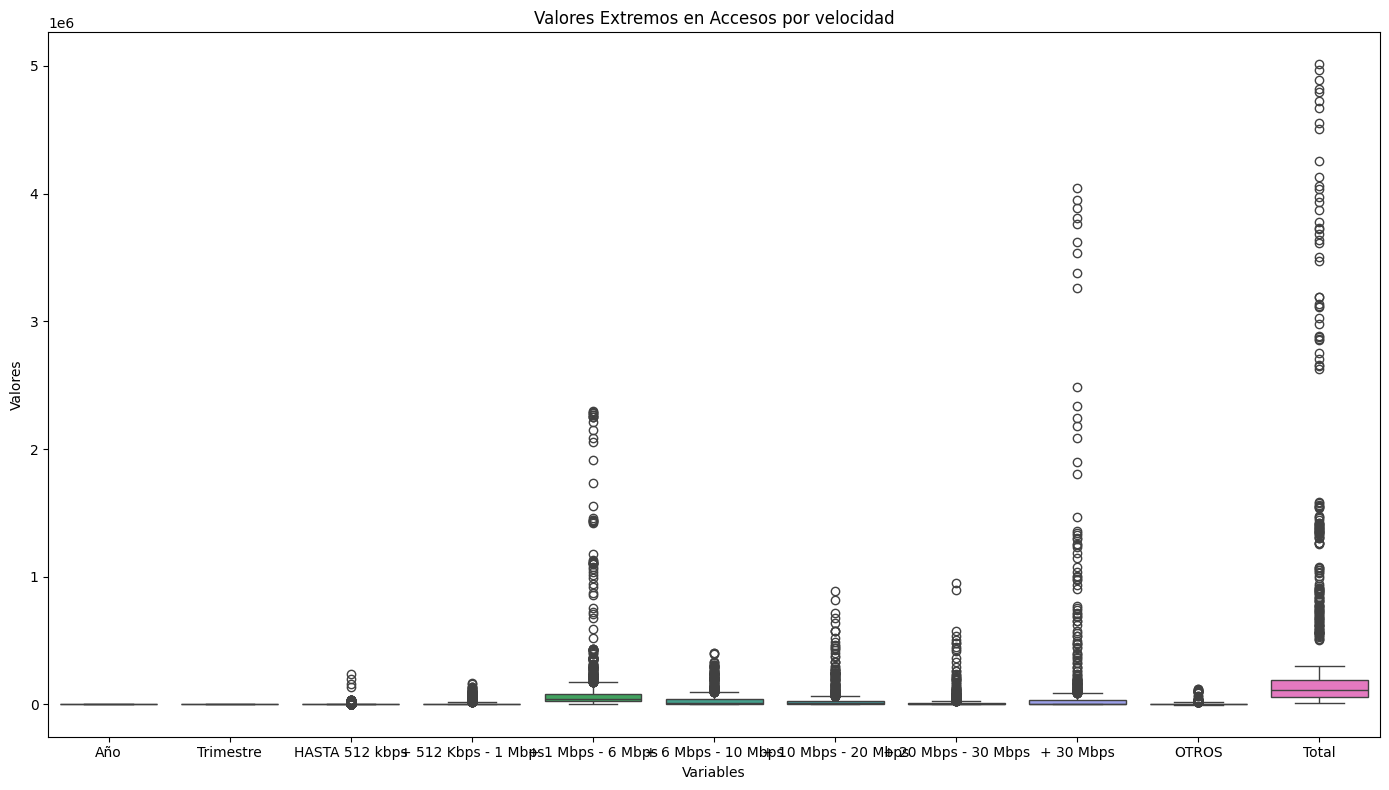

In [192]:
def detectar_valores_extremos(df):
    outliers = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

dataframes = [
    ('Accesos Por Tecnología', df_accesos),
    ('Accesos_tecnologia_localidad', df_localidad),
    #('Velocidad % por prov', df_velocidad_provincia),
    ('Totales Accesos Por Tecnología', df_accesos_tec_totales),
    ('Penetración-población', df_penetracion),
    ('Penetracion-hogares', df_penetracion_hogares),
    ('Totales Accesos por velocidad', df_accesos_velocidad),
    ('Ingresos', df_ingresos),
    ('Accesos por velocidad', df_accesos_totalidad)
]

for name, dataframe in dataframes:
    # Crear boxplots para identificar valores extremos
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=dataframe.select_dtypes(include=['number']))
    plt.xlabel('Variables')
    plt.ylabel('Valores')
    plt.title(f'Valores Extremos en {name}')
    plt.tight_layout()
    plt.show()

El gráfico de caja y bigotes es una herramienta muy útil para visualizar la distribución de un conjunto de datos y detectar valores extremos (outliers).
Los boxplots destacan los valores extremos de manera explícita. 
Los puntos que se encuentran fuera de los "bigotes" del boxplot se consideran outliers.
Los "bigotes" del boxplot generalmente se extienden a 1.5 veces el rango intercuartílico (IQR) desde los cuartiles (Q1 y Q3). Cualquier dato fuera de este rango se considera un outlier.


Cuando fue necesario tratar con un valor extremo se lo modificó en el data set original.

# Relaciones estadisticas descriptivas

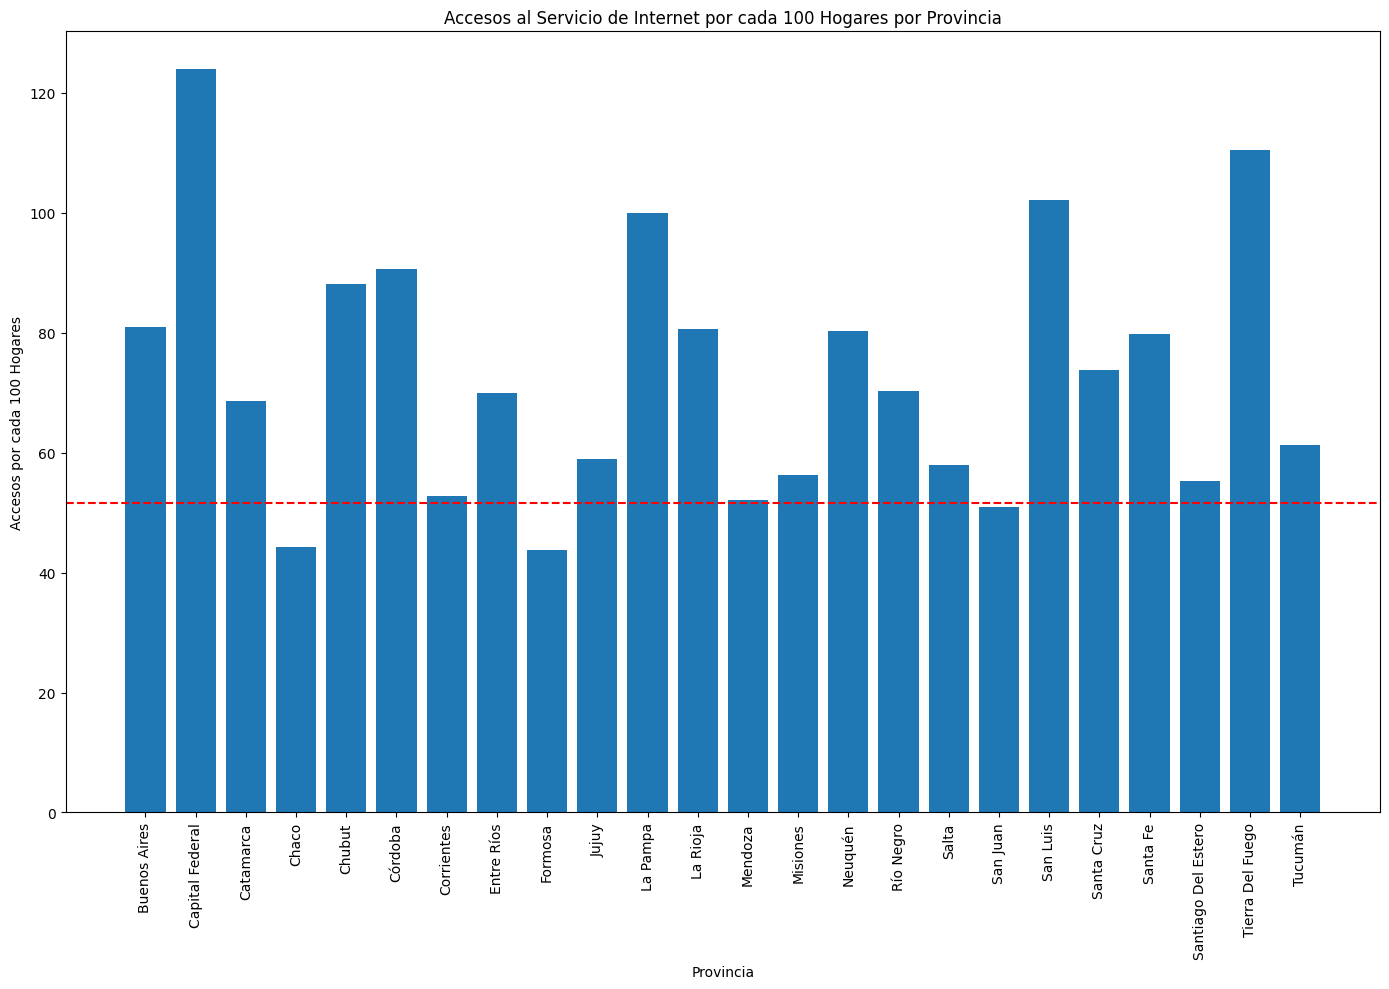

In [112]:
promedio_accesos = df_penetracion_hogares['Accesos por cada 100 hogares'].mean()


plt.figure(figsize=(14, 10))
plt.bar(df_penetracion_hogares['Provincia'], df_penetracion_hogares['Accesos por cada 100 hogares'])
plt.axhline(y=promedio_accesos, color='r', linestyle='--', label=f'Promedio: {promedio_accesos:.2f}')
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 Hogares')
plt.title('Accesos al Servicio de Internet por cada 100 Hogares por Provincia')
plt.tight_layout()
plt.show()

Este es el uso de internet por cada 100 hogares por provincia. Podemos observar que Capital Federal es quien tiene mayor uso del servicio por cada 100 hogares. Mientras que Chacho, Formosa y San Juan se encuentran por debajo de la media.

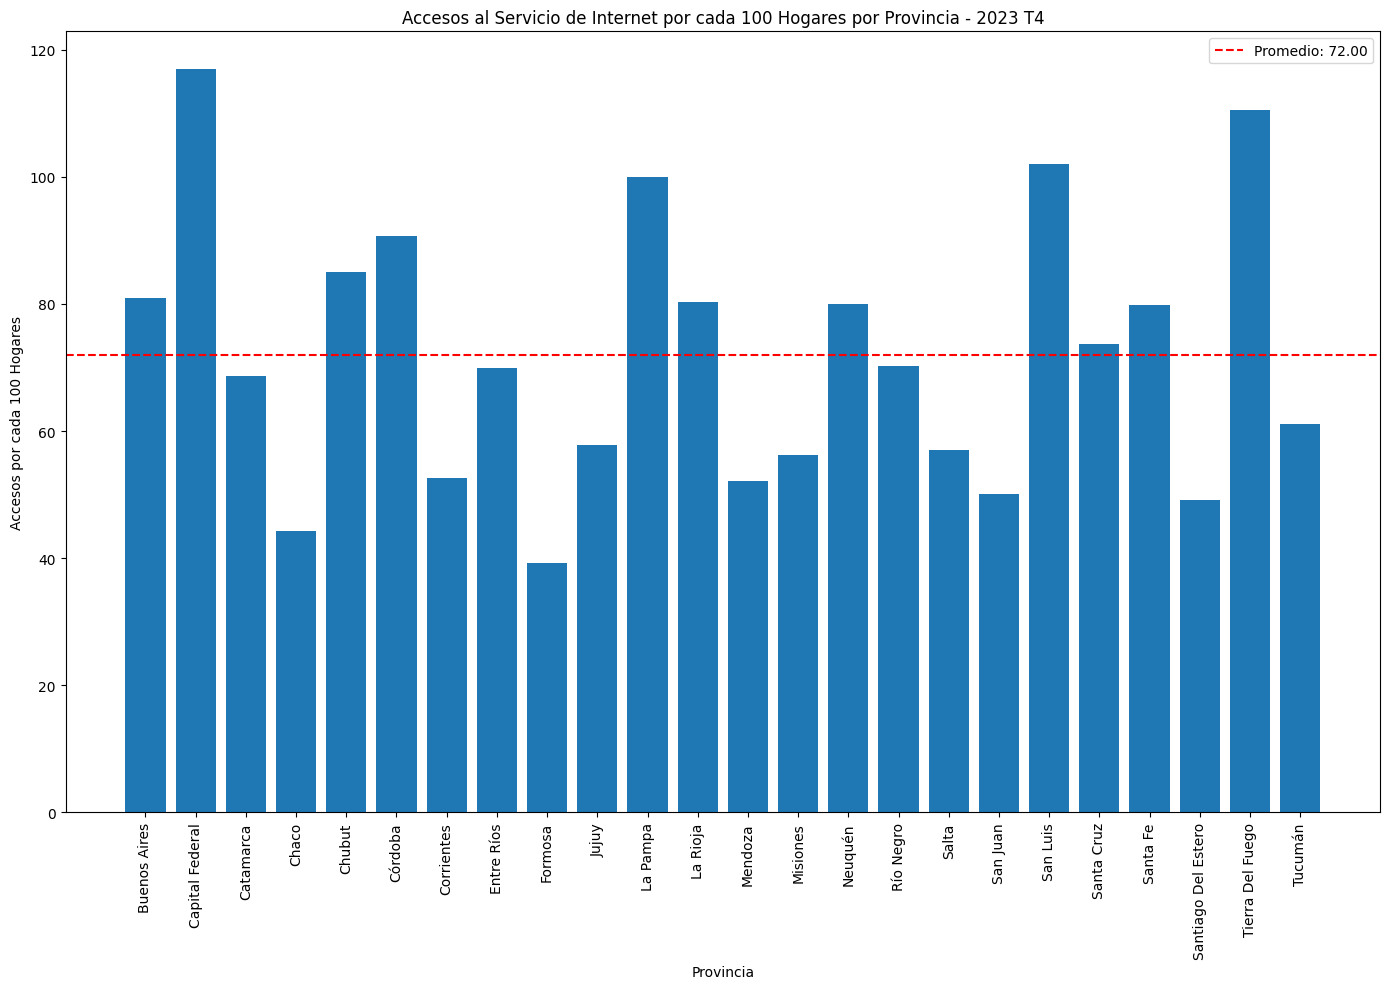

In [113]:
ultimo_ano = df_penetracion_hogares['Año'].max()
ultimo_trimestre = df_penetracion_hogares[df_penetracion_hogares['Año'] == ultimo_ano]['Trimestre'].max()

# Filtrar los datos para obtener solo el último trimestre
df_ultimo_trimestre = df_penetracion_hogares[(df_penetracion_hogares['Año'] == ultimo_ano) & (df_penetracion_hogares['Trimestre'] == ultimo_trimestre)]

# Calcular el promedio de accesos por cada 100 hogares para el último trimestre
promedio_accesos = df_ultimo_trimestre['Accesos por cada 100 hogares'].mean()

# Crear un gráfico de barras para visualizar los accesos por cada 100 hogares por provincia para el último trimestre
plt.figure(figsize=(14, 10))
plt.bar(df_ultimo_trimestre['Provincia'], df_ultimo_trimestre['Accesos por cada 100 hogares'])
plt.axhline(y=promedio_accesos, color='r', linestyle='--', label=f'Promedio: {promedio_accesos:.2f}')
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 Hogares')
plt.title(f'Accesos al Servicio de Internet por cada 100 Hogares por Provincia - {ultimo_ano} T{ultimo_trimestre}')
plt.legend()
plt.tight_layout()
plt.show()

En cambio este es el uso de internet por cada 100 hogares en el último trimestre del año 2023. Con muchas más provincias por debajo del uso promedio. Continúan manteniendose con mayor uso Capital Federal y Tierra del Fuego.

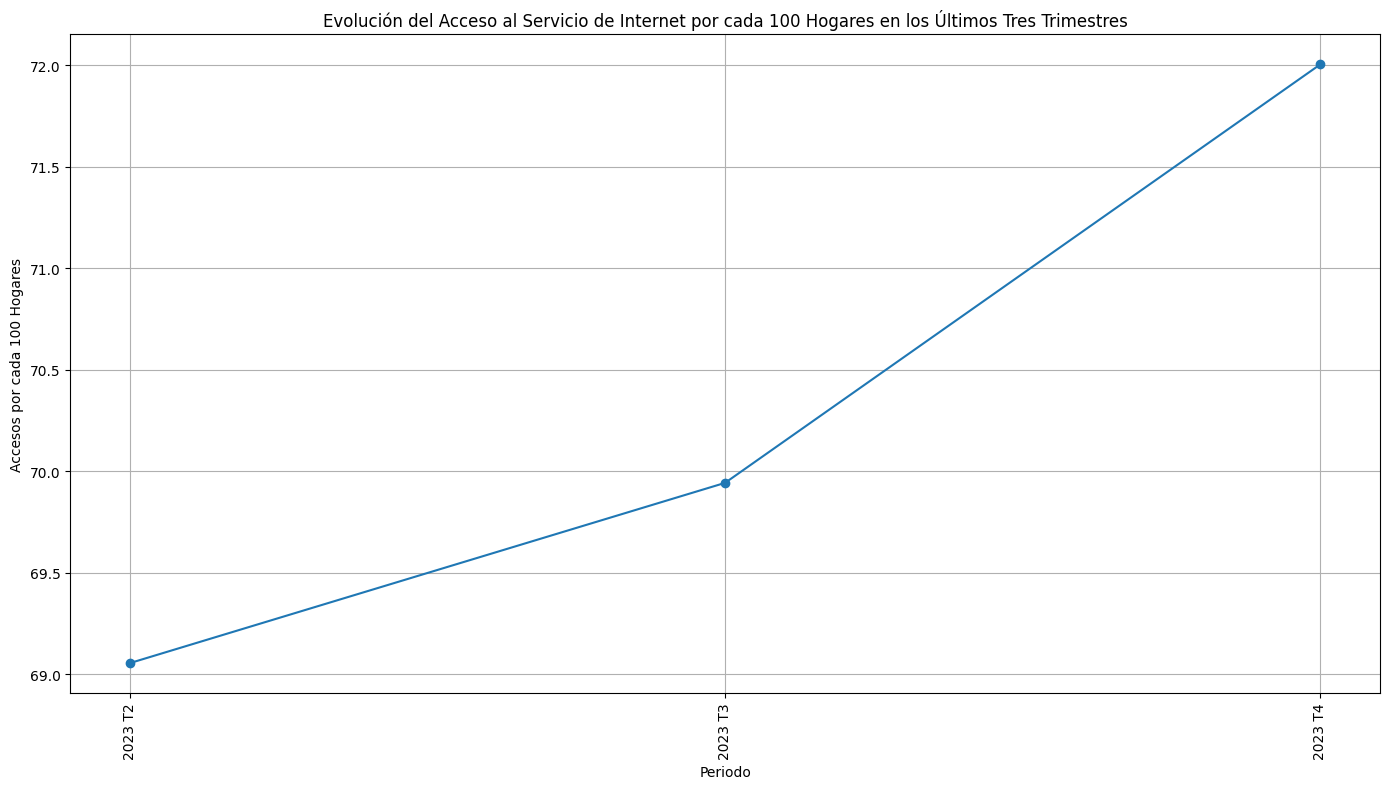

In [114]:
ultimo_ano = df_penetracion_hogares['Año'].max()
ultimo_trimestre = df_penetracion_hogares[df_penetracion_hogares['Año'] == ultimo_ano]['Trimestre'].max()

df_penetracion_hogares['Periodo'] = df_penetracion_hogares['Año'].astype(str) + ' T' + df_penetracion_hogares['Trimestre'].astype(str)

df_penetracion_hogares = df_penetracion_hogares.sort_values(by=['Año', 'Trimestre'], ascending=[False, False])

df_ultimos_tres_trimestres = df_penetracion_hogares.head(3 * len(df_penetracion_hogares['Provincia'].unique()))

promedios_trimestres = df_ultimos_tres_trimestres.groupby('Periodo')['Accesos por cada 100 hogares'].mean().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(promedios_trimestres['Periodo'], promedios_trimestres['Accesos por cada 100 hogares'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 Hogares')
plt.title('Evolución del Acceso al Servicio de Internet por cada 100 Hogares en los Últimos Tres Trimestres')
plt.grid(True)
plt.tight_layout()
plt.show()

En el presente gráfico podemos ver como aumenta el acceso a internet en los últimos tres trimestres para ir analizando la posibilidad de un aumento del 2% posterior.


Promedio de Ingresos por Año:
    Año  Ingresos (miles de pesos)
0  2014               3.420987e+06
1  2015               5.027204e+06
2  2016               6.716877e+06
3  2017               9.917993e+06
4  2018               1.488490e+07
5  2019               2.169313e+07
6  2020               3.189646e+07
7  2021               4.084597e+07
8  2022               6.304227e+07
9  2023               1.306695e+08


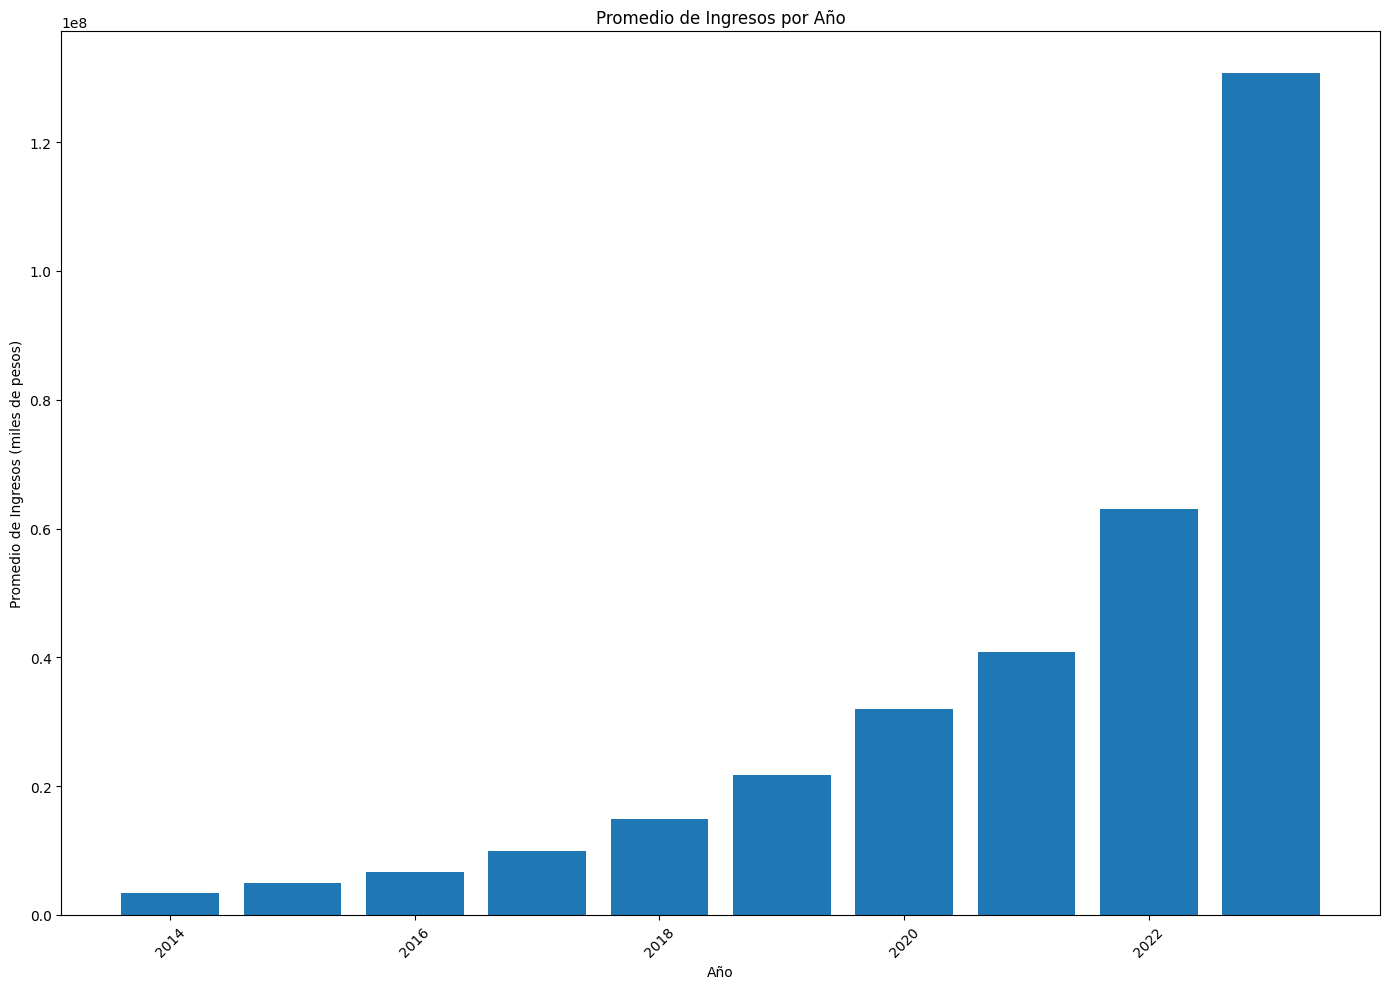

In [123]:
# Calcular el promedio de ingresos por año
promedio_ingresos_ano_df = df_ingresos.groupby('Año')['Ingresos (miles de pesos)'].mean().reset_index()

# Mostrar el DataFrame resultante
print("\nPromedio de Ingresos por Año:")
print(promedio_ingresos_ano_df)

# Crear un gráfico de barras para visualizar el promedio de ingresos por año
plt.figure(figsize=(14, 10))
plt.bar(promedio_ingresos_ano_df['Año'], promedio_ingresos_ano_df['Ingresos (miles de pesos)'])
plt.xticks(rotation=45)
plt.xlabel('Año')
plt.ylabel('Promedio de Ingresos (miles de pesos)')
plt.title('Promedio de Ingresos por Año')
plt.tight_layout()
plt.show()

En este gráfico observamos como las ganancias fueron incrementando a lo largo de los años.

Correlación entre Ingresos y Accesos por cada 100 hogares: 0.4125653271036656


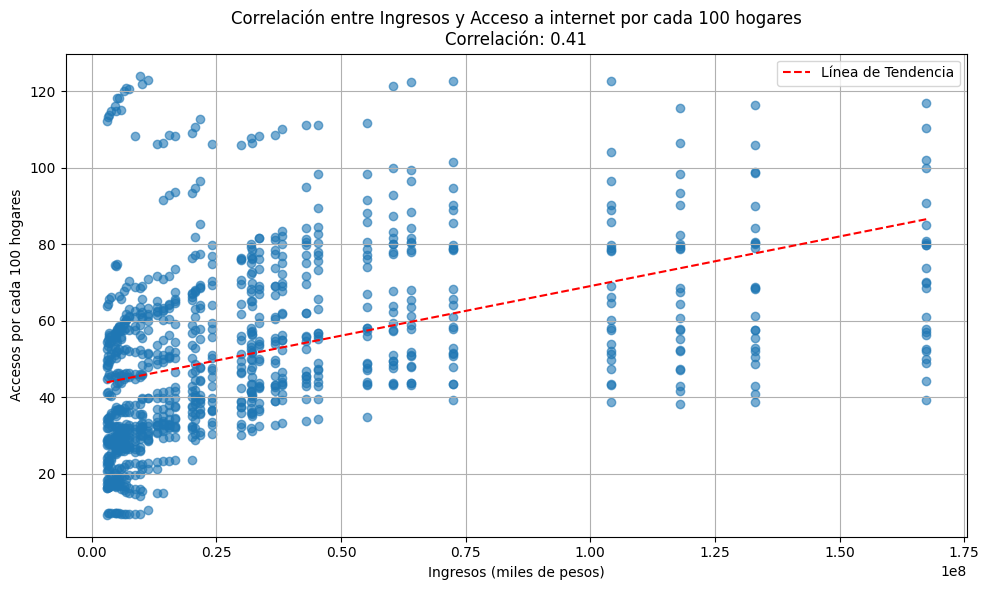

In [129]:
merged_df = pd.merge(df_ingresos, df_penetracion_hogares, on=['Año', 'Trimestre'])

# Calcular la correlación
correlacion = merged_df['Ingresos (miles de pesos)'].corr(merged_df['Accesos por cada 100 hogares'])
print(f"Correlación entre Ingresos y Accesos por cada 100 hogares: {correlacion}")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Ingresos (miles de pesos)'], merged_df['Accesos por cada 100 hogares'], alpha=0.6)

# Ajustar una línea de tendencia
z = np.polyfit(merged_df['Ingresos (miles de pesos)'], merged_df['Accesos por cada 100 hogares'], 1)
p = np.poly1d(z)
plt.plot(merged_df['Ingresos (miles de pesos)'], p(merged_df['Ingresos (miles de pesos)']), color='red', linestyle='--', label='Línea de Tendencia')

plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Accesos por cada 100 hogares')
plt.title(f'Correlación entre Ingresos y Acceso a internet por cada 100 hogares\nCorrelación: {correlacion:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Esta gráfica permitirte visualizar la correlación entre los ingresos y los accesos por cada 100 hogares, junto con una línea de tendencia que muestra la relación general entre estas variables. Una correlación de 0.41 indica una relación positiva moderada entre dos variables. En este contexto, significa que hay una relación positiva entre los ingresos (miles de pesos) y los accesos por cada 100 hogares, aunque no es una relación muy fuerte.



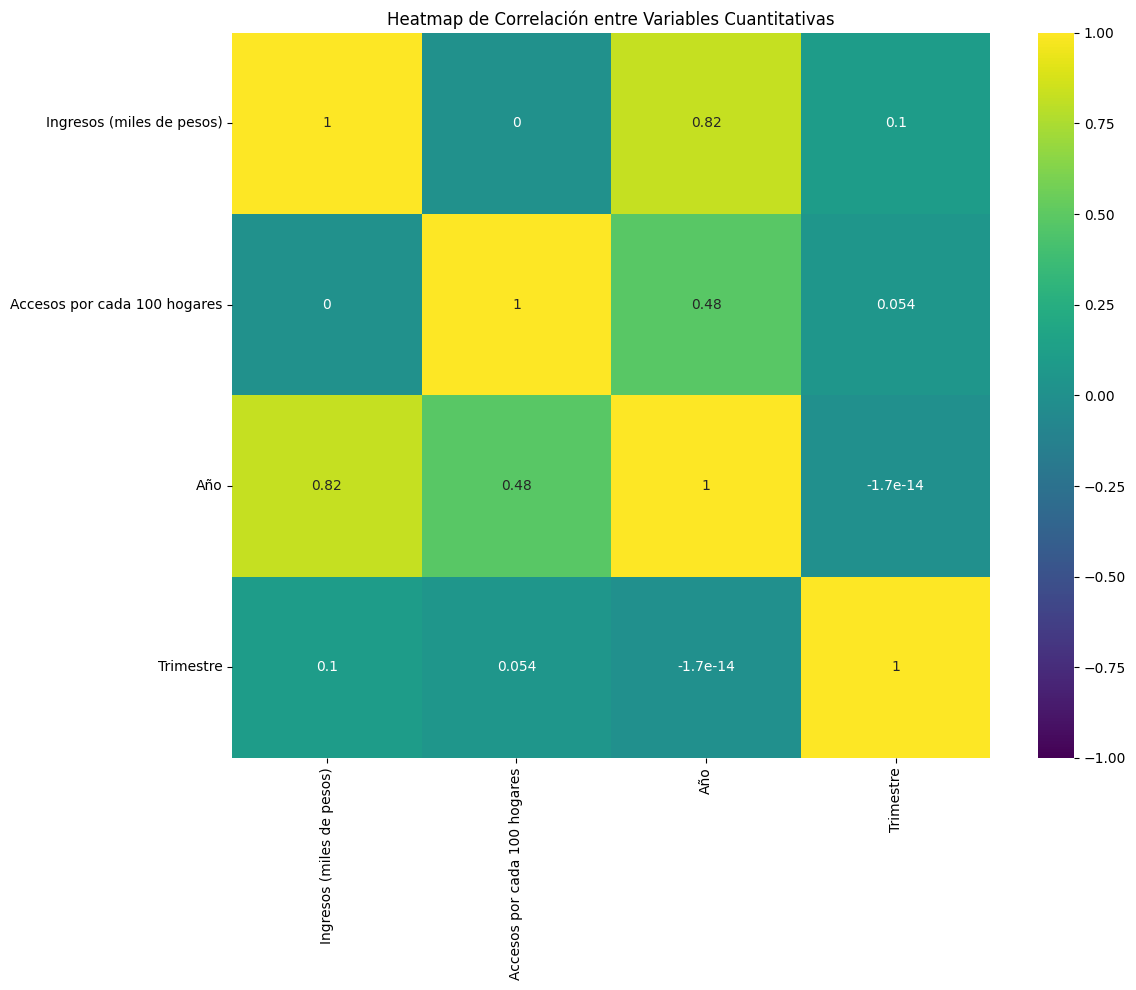

In [167]:
# Concatenar los DataFrames
merged_df = pd.concat([df_ingresos, df_penetracion_hogares, df_accesos_tec_totales, df_localidad], axis=0)

# Seleccionar todas las columnas cuantitativas
quantitative_columns = [
    'Ingresos (miles de pesos)', 
    'Accesos por cada 100 hogares', 
    'Año', 
    'Trimestre'
]

# Calcular la matriz de correlación y eliminar las filas/columnas con NaN
correlation_matrix = merged_df[quantitative_columns].corr()

# Opción 2: Rellenar los valores NaN con un valor específico (por ejemplo, 0)
correlation_matrix_filled = correlation_matrix.fillna(0)


# Alternativamente, crear el heatmap usando la matriz de correlación con NaN rellenados
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_filled, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Heatmap de Correlación entre Variables Cuantitativas')
plt.tight_layout()
plt.show()

En el presente heatmap hecho con variables cuantitvativas las correlaciones más fuertes son las siguientes:

- Ingresos vs año (0.82): Se observa una correlación fuerte entre el paso del tiempo y el mayor número de ingresos. Esto puede deberse. La expansión del mercado de servicios de Internet a nuevas regiones y más usuarios podría contribuir a este incremento.

- Acceso por cada 100 hogares vs año (0.48): Una correlación de 0.48 entre el acceso por cada 100 hogares y el año indica una relación positiva moderada. Esto significa que, a medida que avanzan los años, los accesos por cada 100 hogares tienden a aumentar, aunque no de manera muy fuerte. Puede deberse a un aumento de la demanda. La creciente solicitud de servicios de Internet con el tiempo puede haber impulsado este crecimiento.


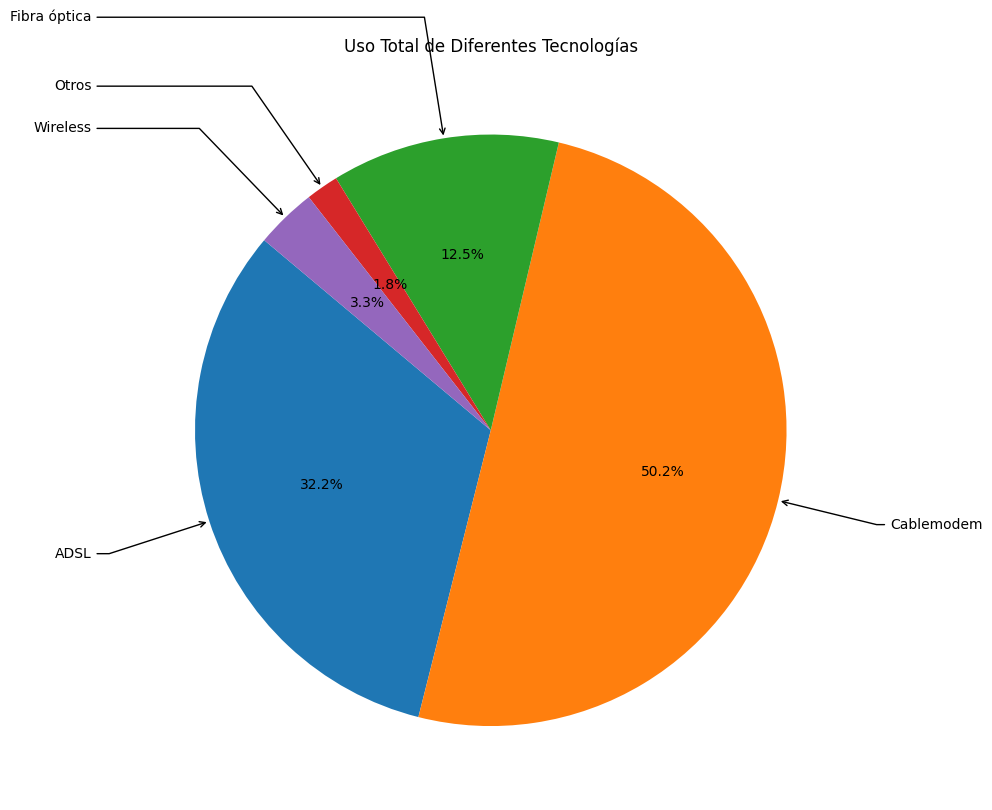

In [178]:
tecnologias_columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Otros', 'Wireless']
df_tecnologias = df_accesos_tec_totales[tecnologias_columns]

total_accesos_tecnologias = df_tecnologias.sum()

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(total_accesos_tecnologias, autopct='%1.1f%%', startangle=140)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    plt.annotate(total_accesos_tecnologias.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))

plt.title('Uso Total de Diferentes Tecnologías')
plt.tight_layout()
plt.show()

La tecnología más utilizada es la de CableModem. Esta información puede ser útil para saber el estado de la misma y saber si es útil actualizarla o no.

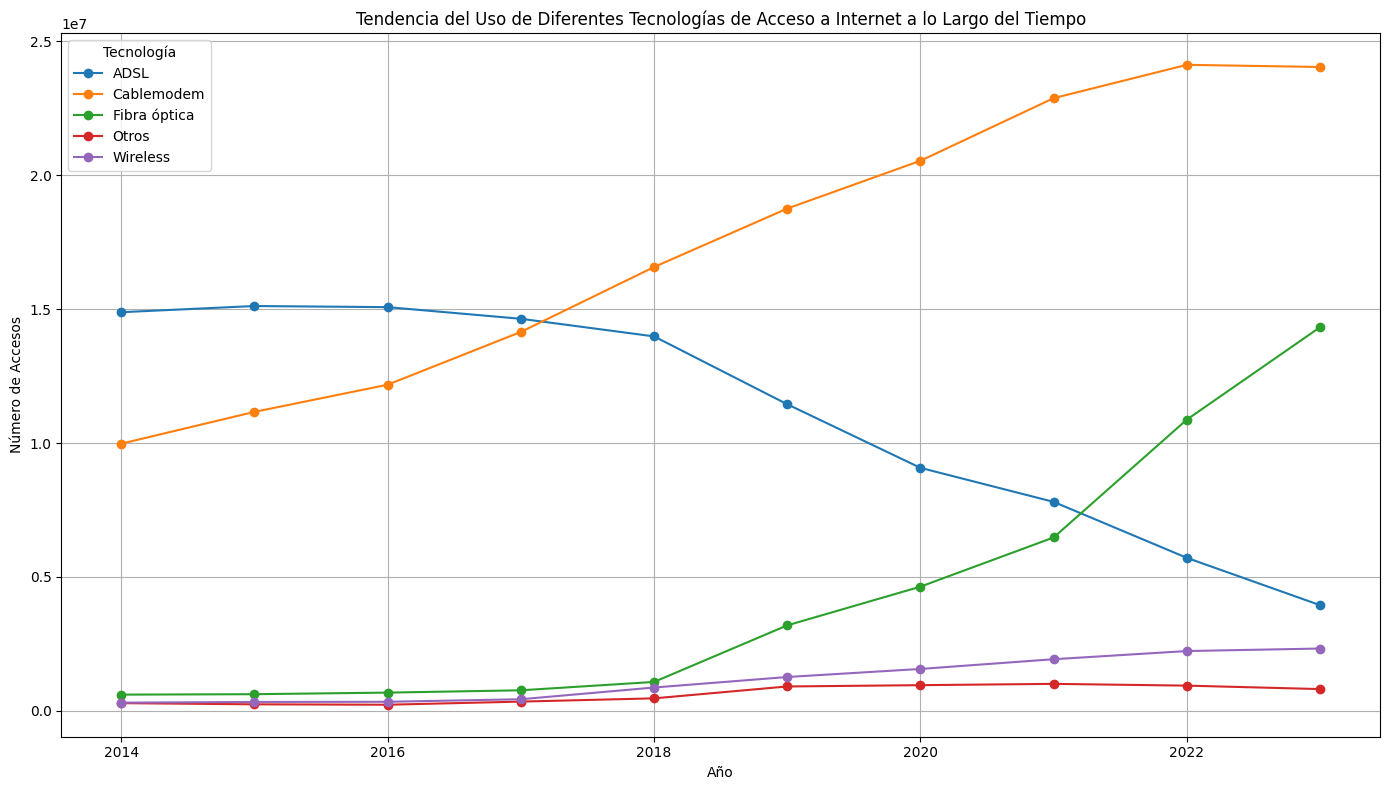

In [179]:
tecnologias_columns = ['Año', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Otros', 'Wireless']
df_tecnologias = df_accesos_tec_totales[tecnologias_columns]

accesos_por_ano = df_tecnologias.groupby('Año').sum().reset_index()

plt.figure(figsize=(14, 8))

for tecnologia in tecnologias_columns[1:]:
    plt.plot(accesos_por_ano['Año'], accesos_por_ano[tecnologia], marker='o', label=tecnologia)

plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.title('Tendencia del Uso de Diferentes Tecnologías de Acceso a Internet a lo Largo del Tiempo')
plt.legend(title='Tecnología')
plt.grid(True)
plt.tight_layout()
plt.show()

Analizar cómo ha cambiado el uso de diferentes tecnologías de acceso a internet a lo largo del tiempo nos permite saber cuáles han aumentado y cuáles han caído en desuso para tomar desiciones en torno a actuaalización.


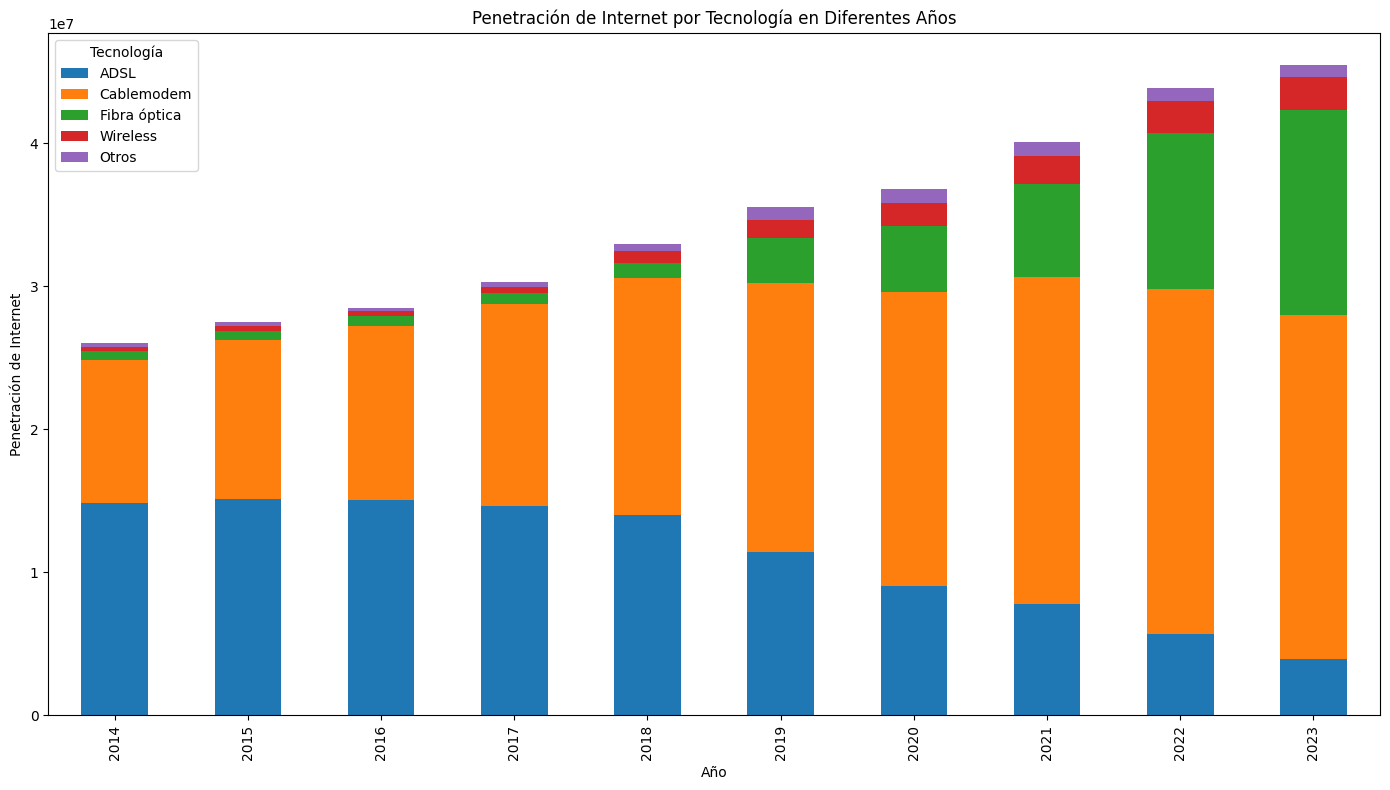

In [194]:
tecnologias_columns = ['Año', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_tecnologias = df_accesos_tec_totales[tecnologias_columns]

penetracion_por_ano = df_tecnologias.groupby('Año').sum().reset_index()

penetracion_por_ano.set_index('Año', inplace=True)
penetracion_por_ano.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.xlabel('Año')
plt.ylabel('Penetración de Internet')
plt.title('Penetración de Internet por Tecnología en Diferentes Años')
plt.legend(title='Tecnología')
plt.tight_layout()
plt.show()


También muestra más detalladamente la penetración de internet por tecnología en diferentes años. Ayuda a los proveedores de servicios de internet a planificar actualizaciones de infraestructura para ofrecer velocidades más altas y mejorar la calidad del servicio.

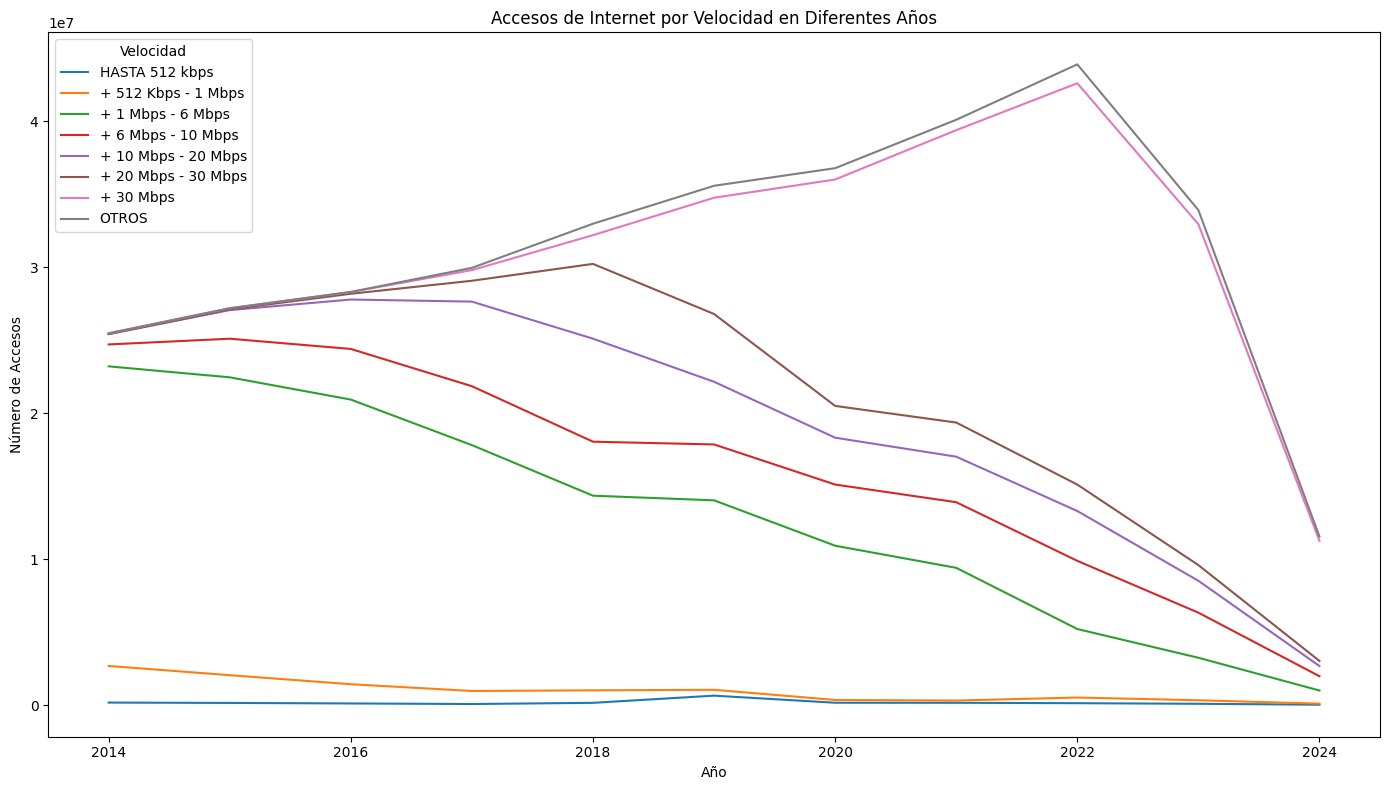

In [206]:
tecnologias_columns = ["HASTA 512 kbps", "+ 512 Kbps - 1 Mbps", "+ 1 Mbps - 6 Mbps", "+ 6 Mbps - 10 Mbps", "+ 10 Mbps - 20 Mbps", "+ 20 Mbps - 30 Mbps", "+ 30 Mbps", "OTROS"]
df_tecnologias = df_accesos_totalidad[['Año'] + tecnologias_columns]

accesos_por_anio = df_tecnologias.groupby('Año').sum().reset_index()


accesos_por_anio.set_index('Año', inplace=True)
accesos_por_anio.plot(kind='line', stacked=True, figsize=(14, 8))

plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.title('Accesos de Internet por Velocidad en Diferentes Años')
plt.legend(title='Velocidad')
plt.tight_layout()
plt.show()

Se comparó la valocidad utilizada a través de diferentes períodos de tiempo. esto puede tener relación con las nuevas tecnologías de internet (por ejemplo, fibra óptica) están siendo adoptadas en comparación con las tecnologías más antiguas (por ejemplo, ADSL) y sus diferentes velocidades soportadas.
